In [67]:
import numpy as np
import pandas as pd
import sklearn
import os
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split

In this file only the final model is shown, other models are described in assignment report.

In [68]:
path_train = ""
path_test = ""
for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        if filename == "song-decades-train.pickle":
            path_train = os.path.join(dirname, filename)
        if filename == "song-decades-test.pickle":
            path_test = os.path.join(dirname, filename)

print(path_train)
print(path_test)

C:\Users\USAID\Desktop\TU GRAZ\WS2020\DL\KU\ASS3\song-decades-train.pickle
C:\Users\USAID\Desktop\TU GRAZ\WS2020\DL\KU\ASS3\song-decades-test.pickle


In [69]:
dict1 = pickle.load(open(path_train, 'rb'))
x_train, y_train = dict1['x_train'], dict1['y_train']

In [70]:
dict2 = pickle.load(open(path_test, 'rb'))
x_test, y_test = dict2['x_test'], dict2['y_test']

Get pd.DataFrame of training dataset to better inspect features.

In [71]:
df_train = pd.DataFrame(data=x_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,26.875080,1243.586426,2178.185791,1184.748535,945.931641,863.210815,538.291138,315.642029,295.795990,287.132355,...,11.103380,10.297690,1.499990,-12.45978,-6.92671,-4.70198,12.03861,3.30228,5.93018,7.82323
1,20.692801,1820.812378,2511.977295,1460.752075,1270.285889,942.201050,1194.021240,659.212769,453.929443,408.896027,...,30.698589,10.317030,-8.083160,8.30787,-11.70716,-0.48728,6.65790,13.57977,-4.43494,1.68251
2,69.203201,3601.314453,5130.273926,2433.981689,1348.701416,702.506226,804.283630,334.737091,806.163147,211.870300,...,0.314660,-32.814411,4.651490,-12.62334,-30.28458,-5.80660,8.66985,-3.31120,1.52785,18.10549
3,20.014610,1155.213257,1404.434204,1346.863525,919.088318,624.909485,562.027527,425.893799,268.491577,271.148346,...,21.436501,-1.225280,-11.430400,-12.31766,-0.44003,-0.05229,16.70611,10.61933,-3.15288,-2.11476
4,51.705200,3586.935547,1946.638306,1884.391968,1166.562012,888.135925,602.705933,412.445007,467.966064,325.744019,...,30.519779,-2.196240,-22.376381,4.19173,-13.30331,0.13214,9.47696,-1.21018,-4.49580,6.40991


Features are inspected using pd.DataFrame.describe() where it shows their max and min values, mean, standard deviation...

In [72]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,33.514835,2278.871582,1946.816772,1441.489746,890.089417,860.854126,588.293213,487.343506,392.929962,317.177490,...,13.741096,1.729082,-7.857687,-7.844602,-2.702416,-1.560551,3.977398,1.463833,-0.106070,3.140625
std,21.122564,1543.175659,1168.658569,1015.415527,440.580597,540.267334,295.005493,269.585175,198.789169,151.849960,...,34.148834,15.420406,22.621651,12.446113,14.373337,7.600089,10.610641,6.272420,4.213229,8.278407
min,1.036930,112.444641,121.719467,89.312119,83.807739,27.581730,47.160439,36.352909,37.709881,36.054668,...,-221.158722,-104.084618,-165.326096,-69.499222,-117.810760,-48.965302,-87.522530,-37.189442,-33.086590,-60.526249
25%,18.622054,1290.966553,1160.160431,812.603470,611.054443,498.419724,394.283630,317.546623,265.666290,217.493771,...,-5.781860,-7.612370,-21.451480,-16.386513,-11.086965,-6.046705,-2.317632,-2.656647,-2.535740,-1.944260
50%,29.377995,1902.085205,1688.840210,1204.094482,803.469757,736.162262,532.649933,431.805389,352.099960,289.435516,...,15.068390,0.519170,-7.087320,-9.199850,-2.331365,-1.494425,3.968800,1.265975,0.009405,2.954020
75%,42.972118,2796.437317,2430.511902,1783.188446,1065.835754,1073.828400,713.739182,584.575684,469.336227,381.478683,...,34.436212,9.404370,6.272870,-0.968955,6.270848,2.962065,10.290805,5.381975,2.435333,7.980932
max,282.059784,30846.714844,16037.863281,31849.486328,19865.931641,10921.137695,10667.728516,7355.391113,4447.481445,3721.873291,...,291.865997,335.771820,204.414627,83.948952,133.663635,126.741272,77.996002,44.710110,88.020821,55.956692


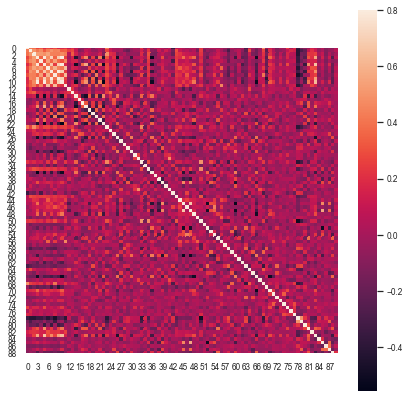

In [73]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True);

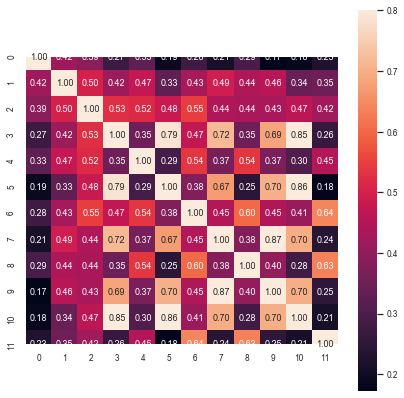

In [74]:
columns = df_train.columns[0:12]
df_train_partial = df_train[columns]
corrmat = df_train_partial.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.set(font_scale=0.75)
sns.heatmap(corrmat, vmax=.8, square=True,annot=True, fmt='.2f');

Text(0.5, 1.0, 'Normal probability plot')

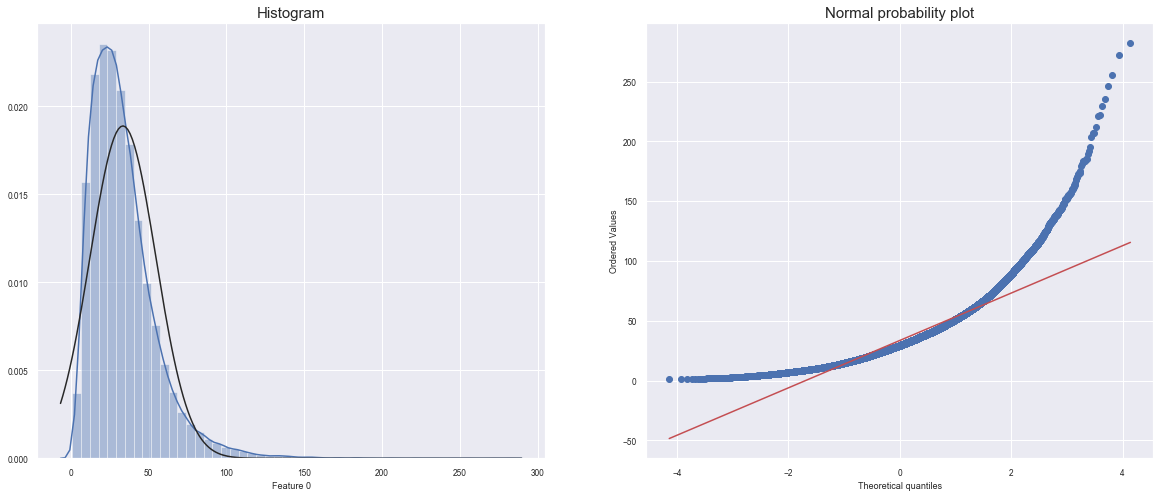

In [75]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

sns.distplot(df_train[0], fit=norm, ax = ax1);
ax1.set_title('Histogram', fontsize=15)
ax1.set_xlabel('Feature 0')

stats.probplot(df_train[0], plot = ax2)
ax2.set_title('Normal probability plot', fontsize=15)


Text(0.5, 1.0, 'Normal probability plot')

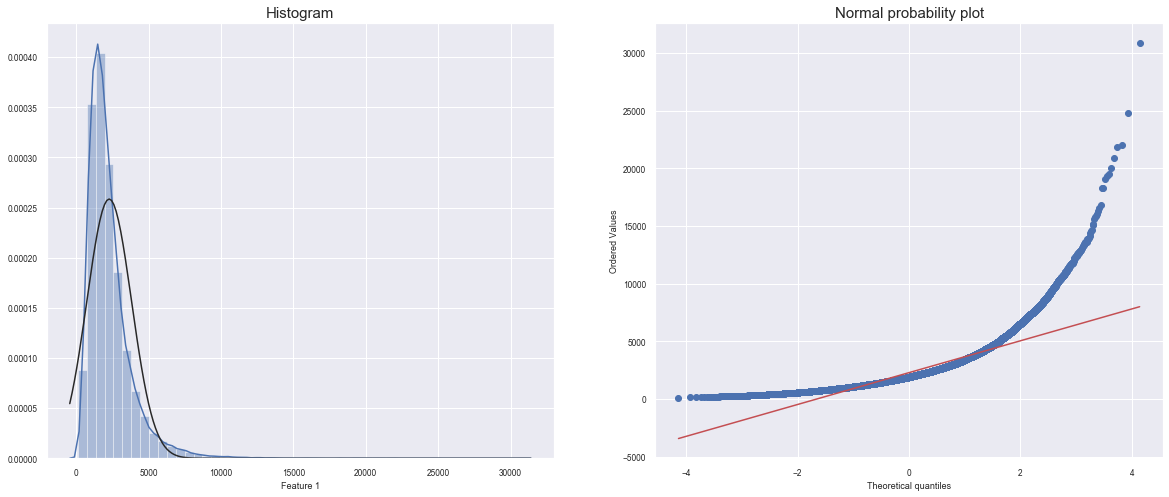

In [76]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

sns.distplot(df_train[1], fit=norm, ax = ax1);
ax1.set_title('Histogram', fontsize=15)
ax1.set_xlabel('Feature 1')

stats.probplot(df_train[1], plot = ax2)
ax2.set_title('Normal probability plot', fontsize=15)

Text(0.5, 1.0, 'Normal probability plot')

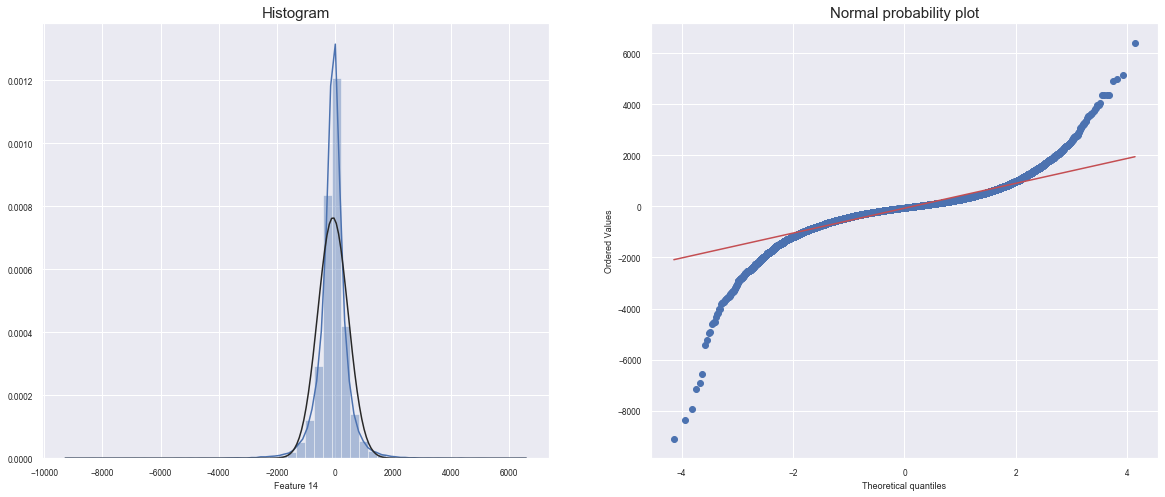

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

sns.distplot(df_train[14], fit=norm, ax = ax1);
ax1.set_title('Histogram', fontsize=15)
ax1.set_xlabel('Feature 14')

stats.probplot(df_train[14], plot = ax2)
ax2.set_title('Normal probability plot', fontsize=15)

Text(0.5, 1.0, 'Normal probability plot')

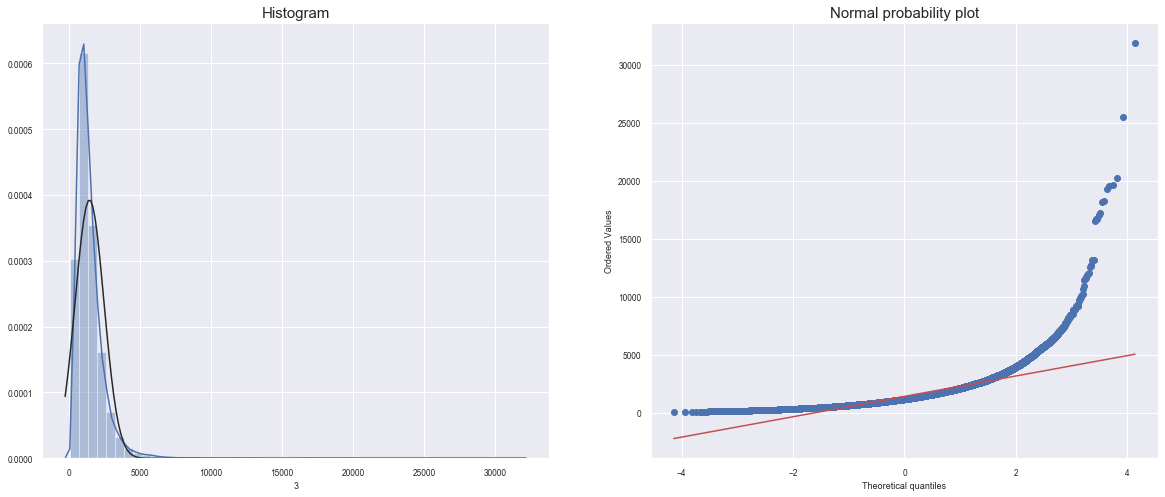

In [78]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

sns.distplot(df_train[3], fit=norm, ax = ax1);
ax1.set_title('Histogram', fontsize=15)

stats.probplot(df_train[3], plot = ax2)
ax2.set_title('Normal probability plot', fontsize=15)

Text(0.5, 1.0, 'Normal probability plot')

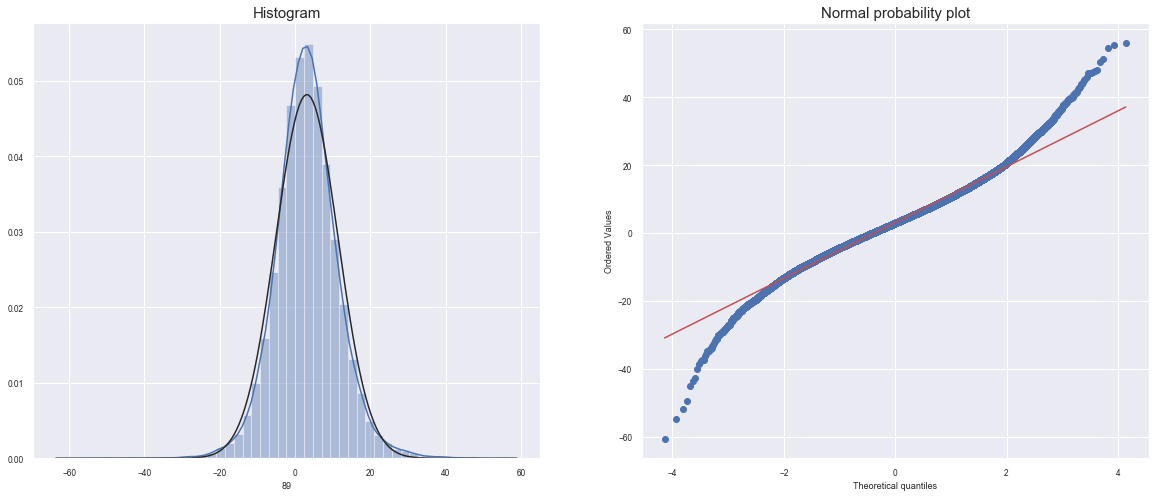

In [79]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

sns.distplot(df_train[89], fit=norm, ax = ax1);
ax1.set_title('Histogram', fontsize=15)

stats.probplot(df_train[89], plot = ax2)
ax2.set_title('Normal probability plot', fontsize=15)

Analyzing feature skewness

In [80]:
positive_skewness = np.array([])
negative_skewness = np.array([])
for i in range(0,90):
    if df_train[i].skew()>0:
        positive_skewness = np.append(positive_skewness, i)
    else:
        negative_skewness = np.append(negative_skewness, i)
print("Features with positive skewness:", positive_skewness)
print("Features with negative skewness:", negative_skewness)

Features with positive skewness: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 17. 20. 21. 23.
 24. 25. 33. 35. 38. 39. 43. 44. 45. 46. 47. 48. 49. 50. 51. 53. 54. 55.
 56. 59. 61. 64. 68. 70. 71. 75. 76. 77. 81. 83. 85. 87. 89.]
Features with negative skewness: [14. 15. 16. 18. 19. 22. 26. 27. 28. 29. 30. 31. 32. 34. 36. 37. 40. 41.
 42. 52. 57. 58. 60. 62. 63. 65. 66. 67. 69. 72. 73. 74. 78. 79. 80. 82.
 84. 86. 88.]


Validation set will be 20% of the train set.

In [81]:
X_tr, X_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

Solution was tested using StandardScaler and MinMaxScaler but StandardScaler showed much better results with all models.

In [82]:
sc = StandardScaler()
x_train_p = sc.fit_transform(X_tr)
x_val_p = sc.fit_transform(X_val)
x_test_p = sc.fit_transform(x_test)

# m_scaler = MinMaxScaler()
# x_train_p = m_scaler.fit_transform(df_train)

In [83]:
df_train_p = pd.DataFrame(x_train_p)
df_train_p.describe()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
count,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,...,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04
mean,-1.192093e-09,-2.145767e-09,-6.437302e-09,1.096725e-08,-8.106232e-09,4.768371e-09,-2.861023e-09,8.225441e-09,-4.410744e-09,-4.827976e-09,...,-9.298325e-09,-3.039837e-09,5.960465e-09,-4.410744e-09,-4.529953e-09,8.702278e-09,-1.907349e-09,-5.245209e-09,8.642673e-09,9.179115e-09
std,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,...,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,-1.533383e+00,-1.401599e+00,-1.569830e+00,-1.329826e+00,-1.866314e+00,-1.551972e+00,-1.860693e+00,-1.673190e+00,-1.789662e+00,-1.852210e+00,...,-6.853447e+00,-6.810141e+00,-6.950956e+00,-4.950410e+00,-8.019403e+00,-6.206920e+00,-8.579938e+00,-6.151473e+00,-7.425687e+00,-7.694020e+00
25%,-7.047455e-01,-6.382330e-01,-6.761670e-01,-6.190048e-01,-6.438559e-01,-6.764369e-01,-6.653898e-01,-6.329759e-01,-6.381733e-01,-6.567249e-01,...,-5.745384e-01,-6.061778e-01,-6.032310e-01,-6.885052e-01,-5.867357e-01,-5.901520e-01,-5.892177e-01,-6.590019e-01,-5.798183e-01,-6.155681e-01
50%,-1.961701e-01,-2.441718e-01,-2.211864e-01,-2.333873e-01,-1.988320e-01,-2.322921e-01,-1.900618e-01,-2.084275e-01,-2.063692e-01,-1.829548e-01,...,3.685155e-02,-7.960736e-02,3.410846e-02,-1.088998e-01,2.392795e-02,9.298738e-03,-1.699594e-03,-3.137111e-02,2.972183e-02,-2.421560e-02
75%,4.448358e-01,3.312985e-01,4.158741e-01,3.399055e-01,4.041258e-01,4.034996e-01,4.350799e-01,3.594742e-01,3.814051e-01,4.252786e-01,...,6.044971e-01,4.929237e-01,6.246895e-01,5.551307e-01,6.237212e-01,5.973359e-01,5.948678e-01,6.269127e-01,6.061147e-01,5.923088e-01
max,1.169545e+01,1.844036e+01,1.209160e+01,2.976400e+01,1.602910e+01,1.347296e+01,1.839395e+01,2.538504e+01,2.037012e+01,2.235022e+01,...,6.970065e+00,2.147675e+01,9.362054e+00,7.358592e+00,9.491427e+00,1.678839e+01,6.952916e+00,6.886868e+00,2.091715e+01,6.212358e+00


In [84]:
le = LabelEncoder()
le_train = le.fit_transform(y_tr)
le_val = le.fit_transform(y_val)
le_test = le.fit_transform(y_test)

oh = OneHotEncoder(sparse=False)

le_train = le_train.reshape(len(le_train), 1)
y_train_p = oh.fit_transform(le_train)


le_val = le_val.reshape(len(le_val), 1)
y_val_p = oh.fit_transform(le_val)

le_test = le_test.reshape(len(le_test), 1)
y_test_p = oh.fit_transform(le_test)


In [85]:
results = pd.DataFrame({})

In [86]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, input_shape=(90,), activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu', 
                                bias_regularizer=regularizers.l2(l2=0.1)))
model.add(tf.keras.layers.Dense(4, activation='softmax'))


model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Early stopping with monitoring validation loss, and restoring best weights
earlyStop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    min_delta=0.005, 
    patience=13, 
    verbose=1,
    restore_best_weights=True)

train_history = model.fit(
    x_train_p, y_train_p, 
    epochs = 60,
    batch_size = 32, 
    validation_data=(x_val_p, y_val_p), 
    callbacks=[earlyStop])

val_loss_arr = np.array(train_history.history['val_loss'])
idx = np.argmin(val_loss_arr)

temp = pd.DataFrame({
                'model': ['M4'],
                'train acc': [train_history.history['accuracy'][idx]],
                'train loss': [train_history.history['loss'][idx]],
                'val acc': [train_history.history['val_accuracy'][idx]],
                'val loss': [train_history.history['val_loss'][idx]]
              })

results = pd.concat([results, temp])

Epoch 1/60
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1410 - accuracy: 0.5033 - val_loss: 1.0141 - val_accuracy: 0.5730
Epoch 2/60
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0221 - accuracy: 0.5718 - val_loss: 0.9910 - val_accuracy: 0.5828
Epoch 3/60
1000/1000 [==============================] - 2s 2ms/step - loss: 0.9870 - accuracy: 0.5883 - val_loss: 0.9669 - val_accuracy: 0.6000
Epoch 4/60
1000/1000 [==============================] - 2s 2ms/step - loss: 0.9671 - accuracy: 0.5975 - val_loss: 0.9543 - val_accuracy: 0.6047
Epoch 5/60
1000/1000 [==============================] - 2s 2ms/step - loss: 0.9506 - accuracy: 0.6040 - val_loss: 0.9451 - val_accuracy: 0.6122
Epoch 6/60
1000/1000 [==============================] - 2s 2ms/step - loss: 0.9385 - accuracy: 0.6128 - val_loss: 0.9354 - val_accuracy: 0.6145
Epoch 7/60
1000/1000 [==============================] - 2s 2ms/step - loss: 0.9272 - accuracy: 0.6166 - val_loss: 0.9362 - val_accuracy:

In [87]:
results

,model,train acc,train loss,val acc,val loss
0,M4,0.674625,0.806931,0.6355,0.901354


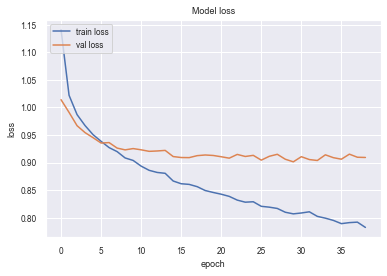

In [88]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

In [89]:
model.evaluate(x_test_p, y_test_p, batch_size=64)

63/63 [==============================] - 0s 1ms/step - loss: 0.8839 - accuracy: 0.6400


[0.8839498162269592, 0.6399999856948853]

In [90]:
y_pred = model.predict(x_test_p)

In [91]:
y = tf.argmax(y_pred, axis=-1)
print(np.array(le_test[:,0]))
print(np.array(y))

[3 0 0 ... 0 1 3]
[2 0 0 ... 3 1 2]


In [92]:
cf = sklearn.metrics.multilabel_confusion_matrix(np.array(le_test[:,0]), np.array(y))

In [93]:
cf

array([[[2728,  272],
        [ 237,  763]],

       [[2545,  455],
        [ 321,  679]],

       [[2658,  342],
        [ 436,  564]],

       [[2629,  371],
        [ 446,  554]]], dtype=int64)

In [107]:
c = pd.DataFrame({})

In [108]:
for i in range(0,4):
    c = pd.concat([c, pd.DataFrame(cf[i])])

0
1
2
3


In [109]:
c

,0,1
0,2728,272
1,237,763
0,2545,455
1,321,679
0,2658,342
1,436,564
0,2629,371
1,446,554
